----
<h1 align="center"><span style='font-family:Georgia'>Results Visualization </span></h1>

---

## Notebook Decription:

The notebook aims to visualize the performance of five trained models on different five datasets (ETDatasets and Cryptocurrency). The results from the testing phase of each model were saved as numpy files in the "/results" directory. 

**1. Loading Results:** First loads the saved numpy files containing the testing results for each model. These results could include metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), or any other relevant metrics.

**2. Visualizations:** 

- **Line Plots:** Show the performance of each model over time. 
- **Bar Plots:** Bar plots may be used to compare the performance of different models on specific metrics. 

**Import needed dependencies**

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Allocate color palette**

In [50]:
plt.style.use('seaborn-white')
%matplotlib inline

RdBu_colors  = sns.color_palette("RdBu",15)
pastel_colors  = sns.color_palette("pastel",15)
blind_colors = sns.color_palette("colorblind", 15)
sns.set_theme(style="whitegrid", palette=blind_colors)

RdBu_colors
pastel_colors
blind_colors

/tmp/ipykernel_927/3255770194.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844)]

In [78]:
def Evaluate( dataset, pred_len, ax):
    """
    Plots the predicted and true values for a given model and prediction horizon (pred_len).

    Args:
    model_name (str): The name of the model used to make predictions.
    pred_len (int): The length of the prediction horizon (i.e., the number of future values to predict).
    ax (matplotlib.axes.Axes): A Matplotlib Axes object on which to draw the plot.
    colors (List[str]): A list of two colors to use for the actual and predicted lines, respectively.
    
    """
    setting = f'DLinear_train_on_{dataset}_'+str(pred_len)
    trues = np.load('./results/'+ setting +'/true.npy') # [samples, pred_len, dimensions]

    sns.lineplot(x=range(len(trues[0,:100,-1])), y=trues[0,:100,-1], label="Ground Truth", color=RdBu_colors[0] , ax=ax) 
    
    for i, model_name in enumerate(['DLinear', 'NLinear', 'informer', 'FEDformer']):#, 'PatchTST']:
        setting = model_name+f'_train_on_{dataset}_'+str(pred_len)
        preds = np.load('./results/'+ setting +'/pred.npy') # [samples, pred_len, dimensions]
        
        sns.lineplot(x=range(len(preds[0,:100,-1])), y=preds[0,:100,-1], label=model_name, color=blind_colors[-2*(i+2)], ax=ax)
        
    ax.set_xticks([])
    ax.set_title(f"{model_name} Results of {pred_len} Prediction Length of `OT` Column")
    ax.legend(loc='best')
    

In [101]:
def Visualize_Error(dataset, pred_len, ax):
    
    bar_width = 0.35
    r1 = np.arange(3)
    r2 = r1 + bar_width 
    
    mae_values , mse_values = [], [], 
    models = ['informer', 'FEDformer','NLinear'] #, 'PatchTST']: 'DLinear', 'NLinear',
    for i, model_name in enumerate(models):
        
        setting = model_name+f'_train_on_{dataset}_'+str(pred_len)
        mae, mse, rmse, mape, mspe = np.load('./results/'+ setting +'/metrics.npy')
        mse_values.append(mse)
        mae_values.append(mae)
        
    # Create the bar plot for MSE
    ax.bar(r1, mse_values, color=blind_colors[0], width=bar_width, label='MSE') #, edgecolor='black'
    # Create the bar plot for MAE
    ax.bar(r2, mae_values, color=RdBu_colors[0], width=bar_width, label='MAE')
    
    ax.set_xticks([r + bar_width / 2 for r in range(len(models))], models)
    ax.set_title(f"MSE and MAE for [{pred_len}] Prediction Length in {dataset} Dataset")
    ax.legend(loc='best')


---
### Evaluating the `ETTh1` dataset

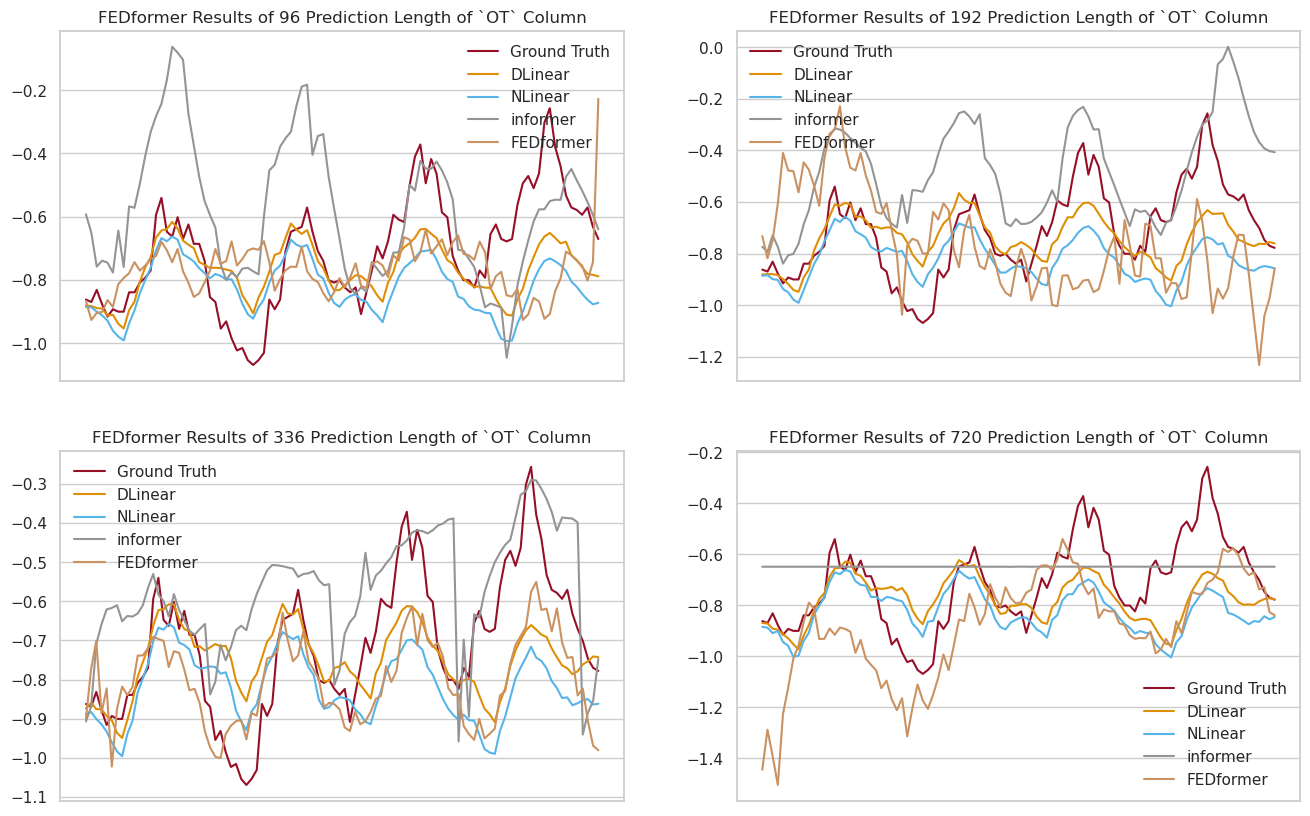

In [80]:
dataset='ETTh1'
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

for i, pred_len in enumerate([96,192,336,720]):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    Evaluate(dataset, pred_len, ax)
    
plt.show()

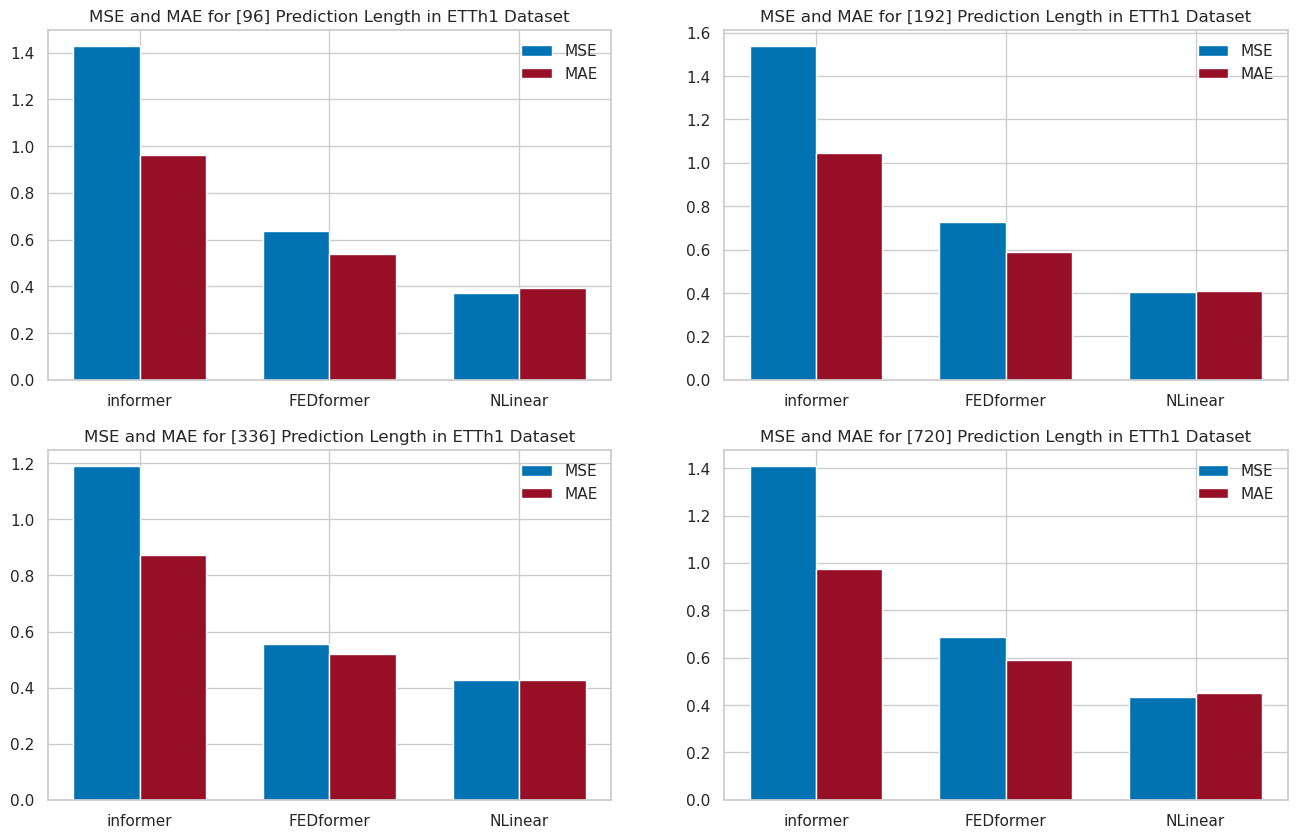

In [102]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

for i, pred_len in enumerate([96,192,336,720]):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    Visualize_Error(dataset, pred_len, ax)
    
plt.show()

---
### Evaluating the `ETTh2` dataset

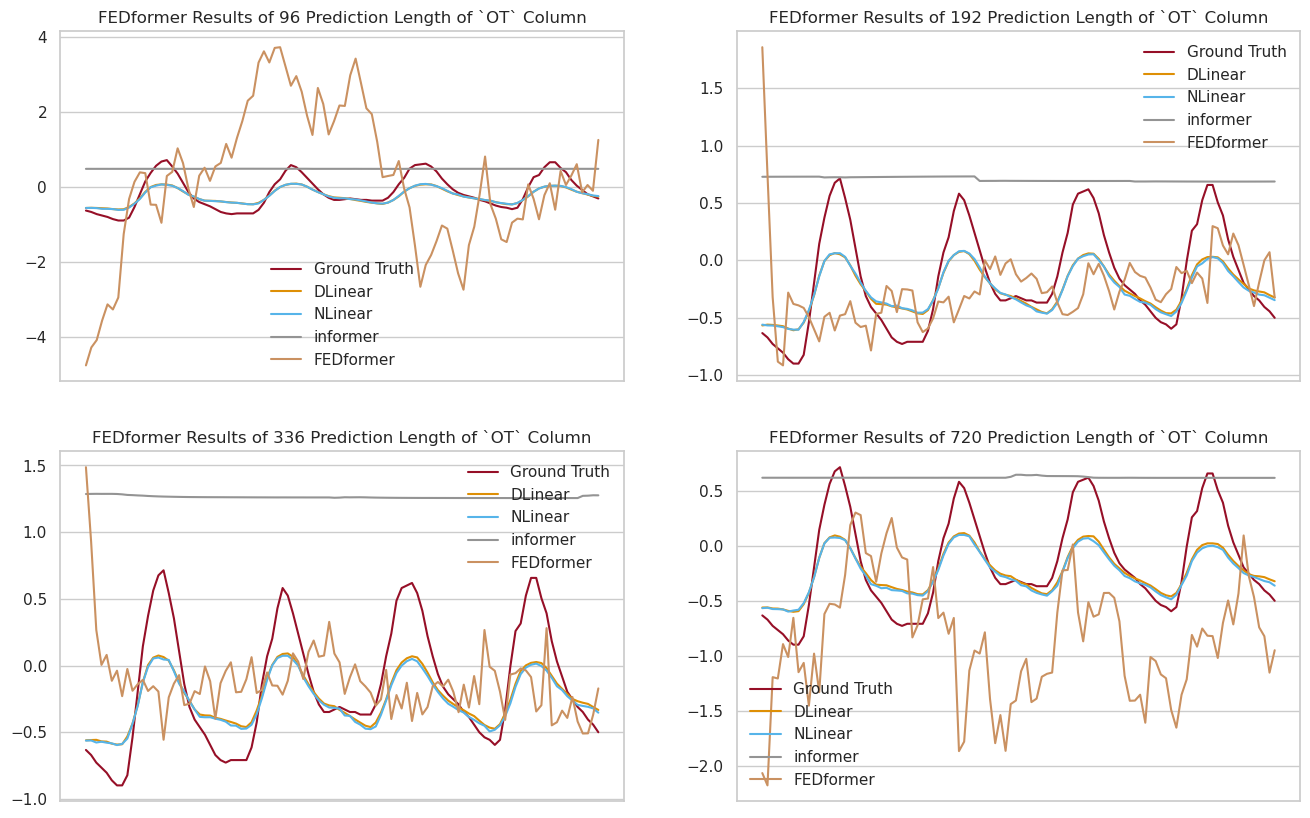

In [103]:
dataset='ETTh2'
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

for i, pred_len in enumerate([96,192,336,720]):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    Evaluate(dataset, pred_len, ax)

plt.show()

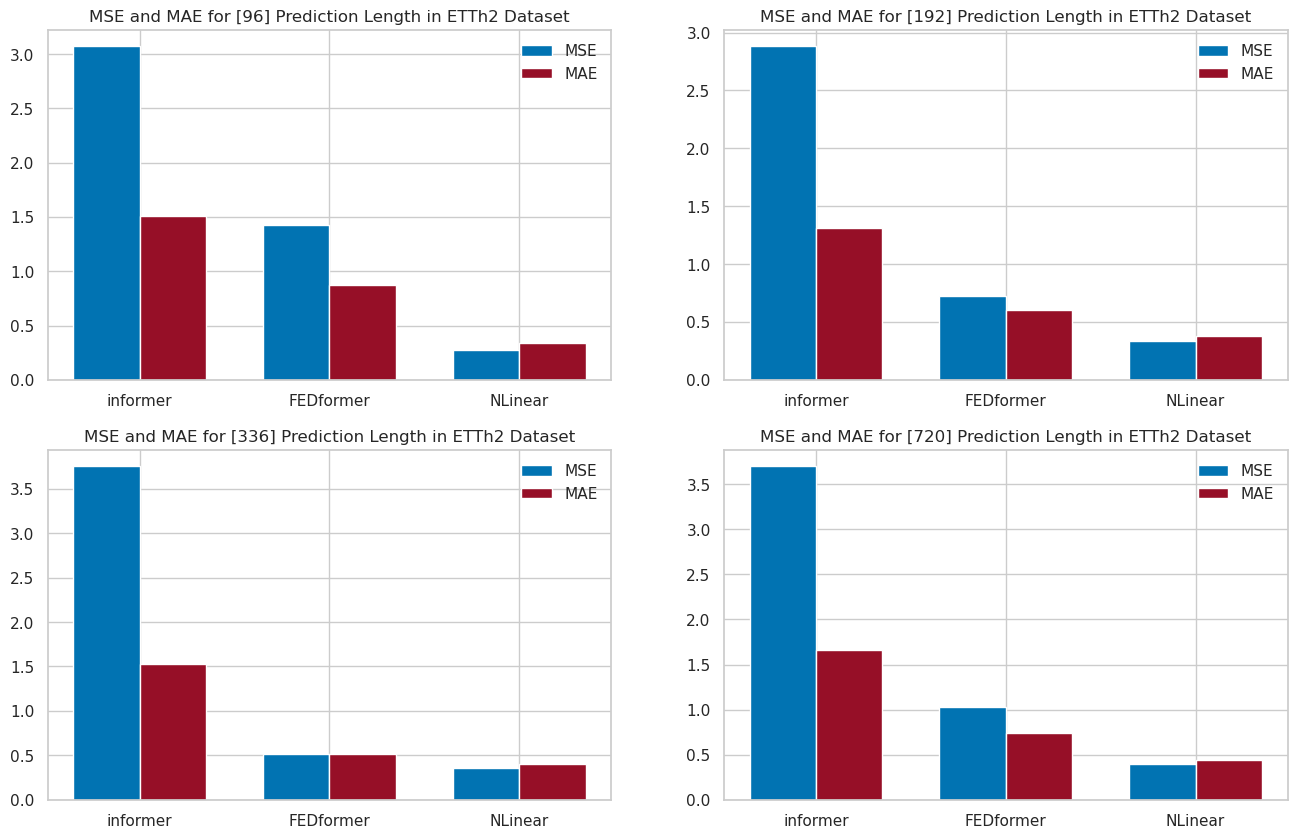

In [104]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

for i, pred_len in enumerate([96,192,336,720]):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    Visualize_Error(dataset, pred_len, ax)
    
plt.show()

---
### Evaluating the `ETTm1` dataset

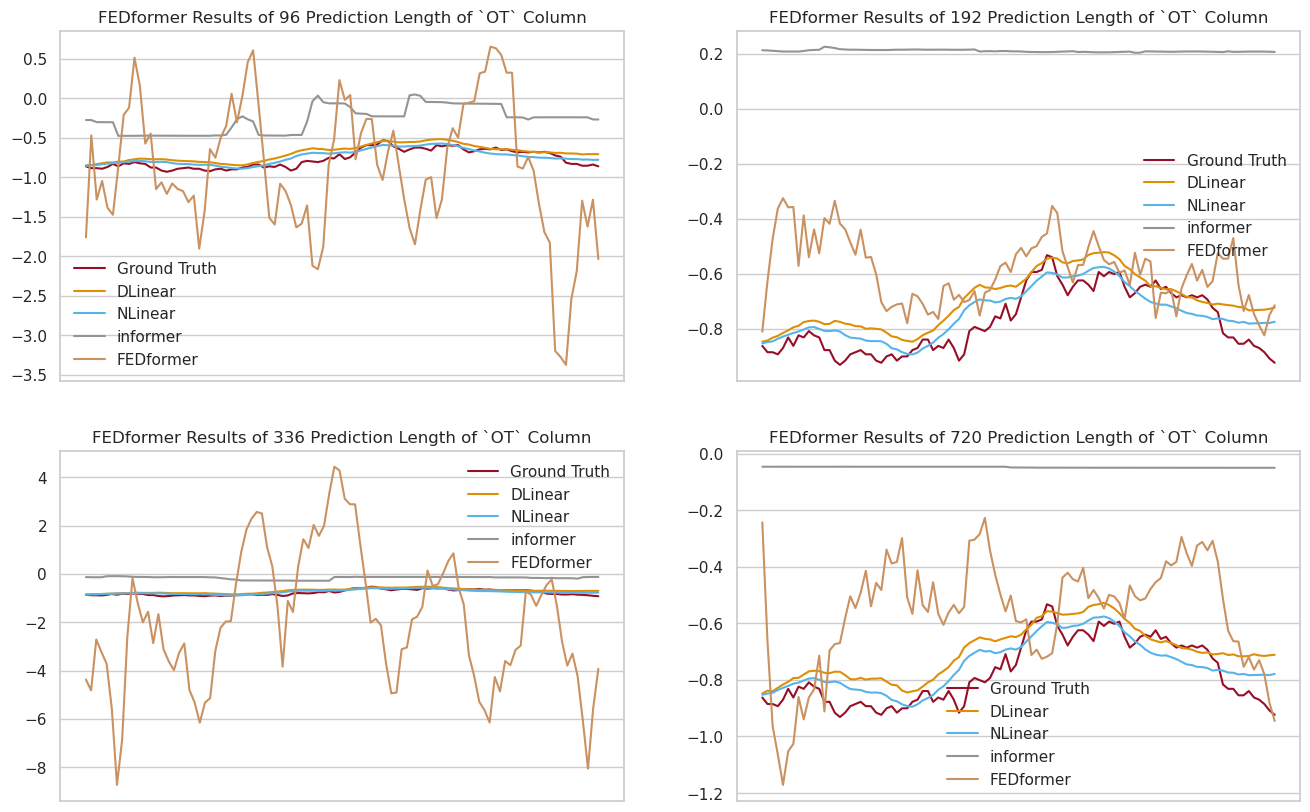

In [106]:
dataset='ETTm1'
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

for i, pred_len in enumerate([96,192,336,720]):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    Evaluate(dataset, pred_len, ax)

plt.show()

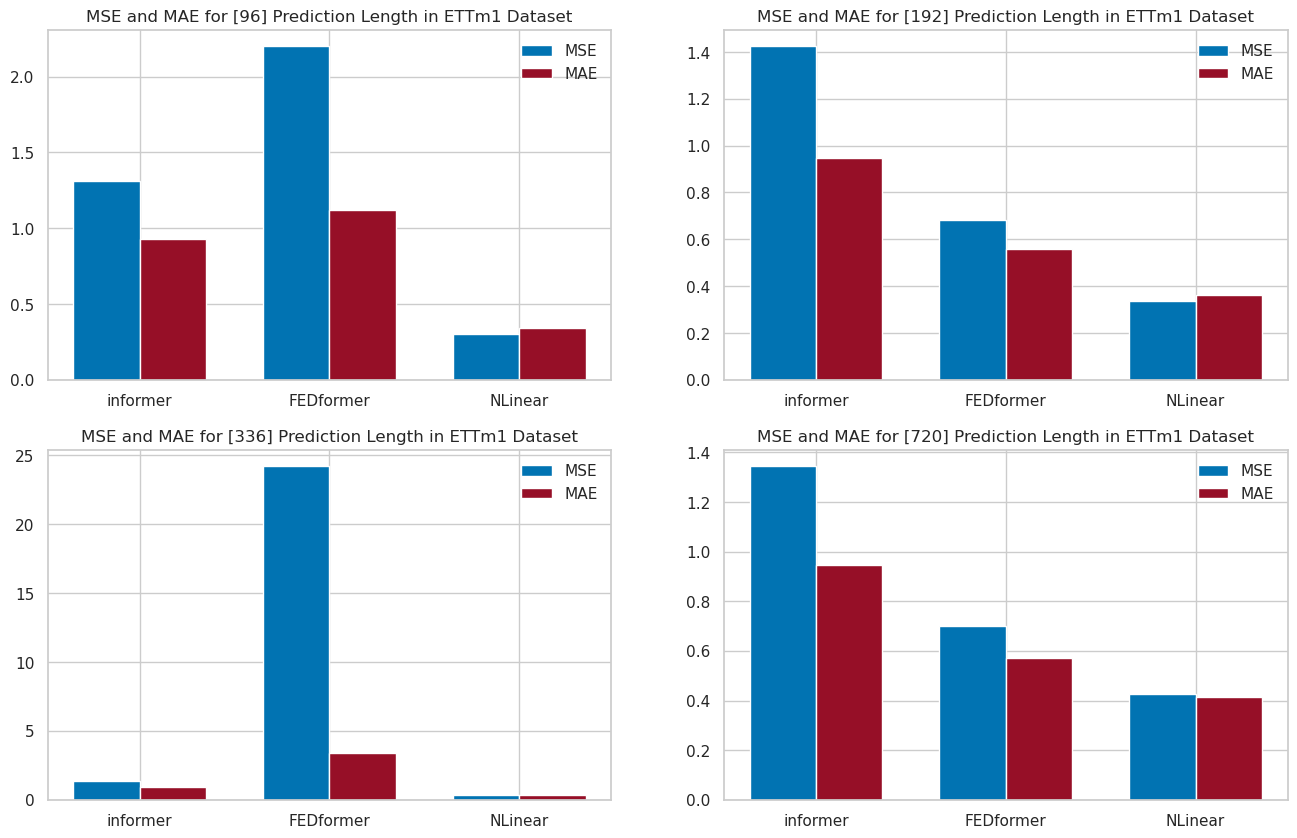

In [107]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

for i, pred_len in enumerate([96,192,336,720]):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    Visualize_Error(dataset, pred_len, ax)
    
plt.show()

---
### Evaluating the `ETTm2` dataset

In [ ]:
dataset='ETTm2'
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

for i, pred_len in enumerate([96,192,336,720]):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    Evaluate(dataset, pred_len, ax)

plt.show()

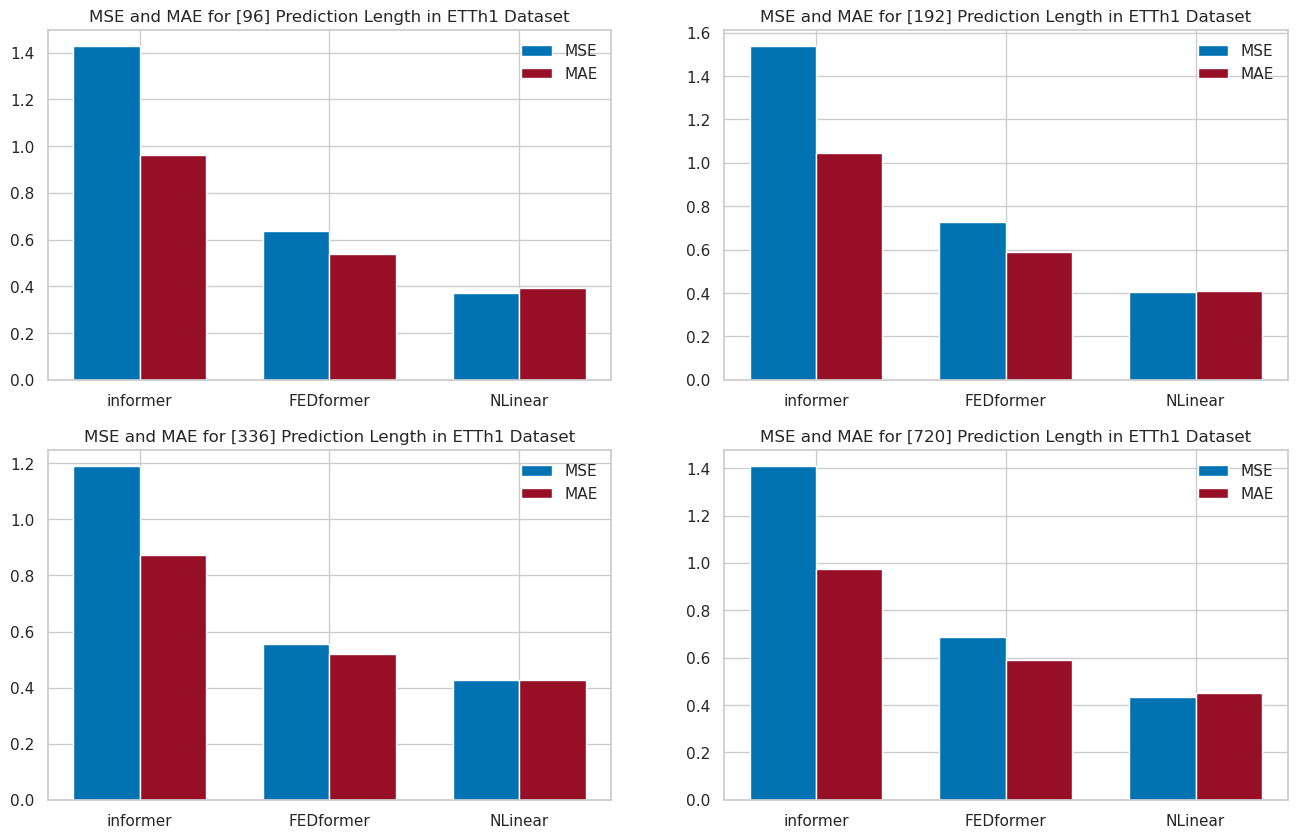

In [102]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

for i, pred_len in enumerate([96,192,336,720]):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    Visualize_Error(dataset, pred_len, ax)
    
plt.show()

---
### Evaluating the `cryptoh1` dataset

TypeError: Evaluate() takes 3 positional arguments but 4 were given

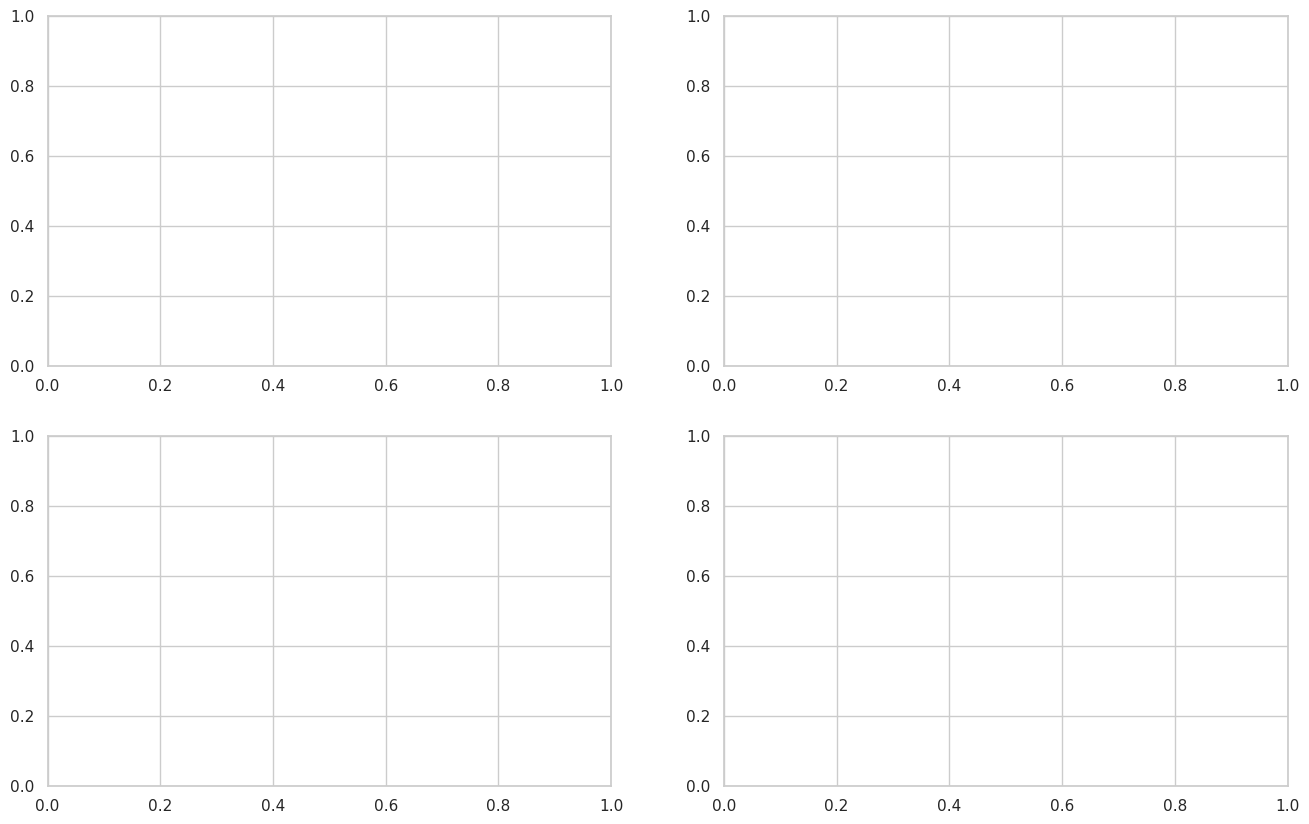

In [109]:
dataset='cryptoh1'
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

for i, pred_len in enumerate([96,192,336,720]):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    Evaluate(dataset, pred_len, ax, colors)

plt.show()

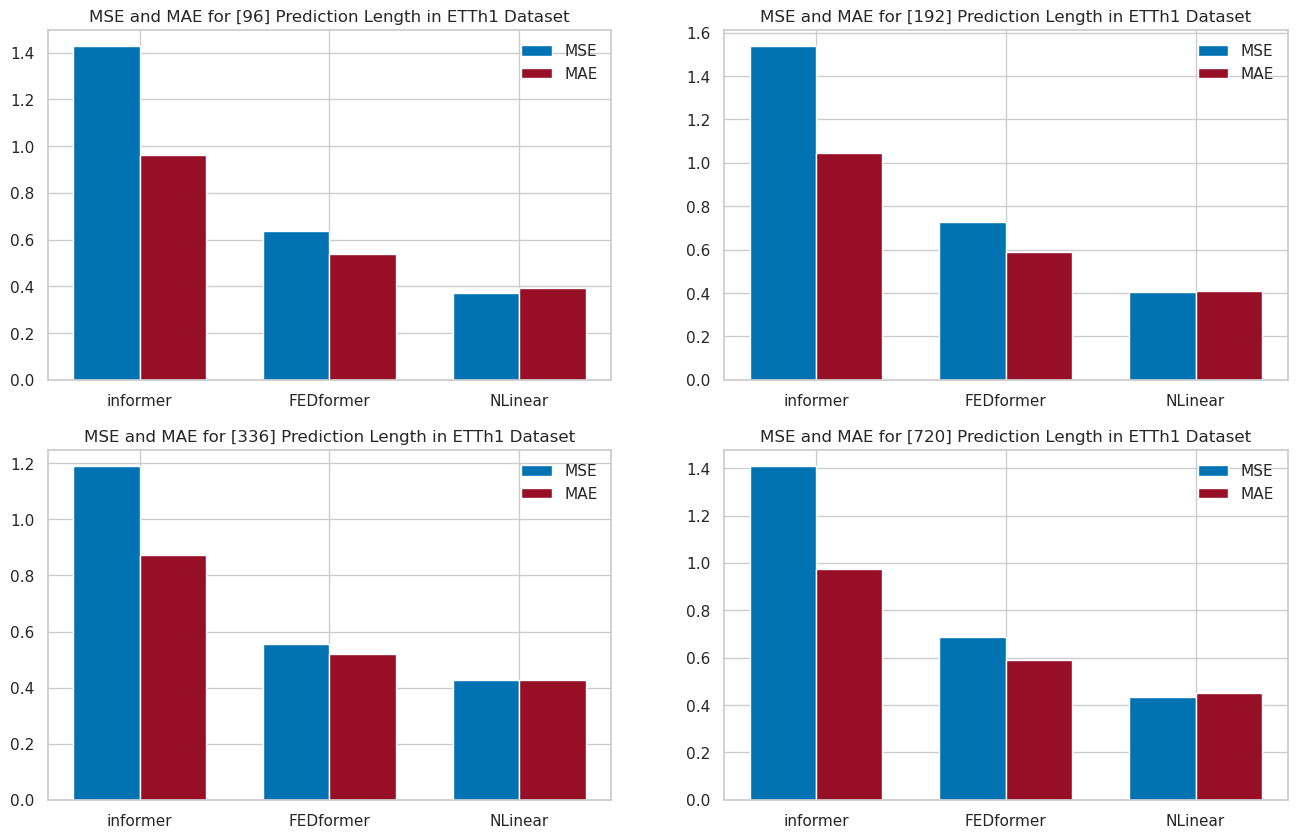

In [102]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

for i, pred_len in enumerate([96,192,336,720]):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    Visualize_Error(dataset, pred_len, ax)
    
plt.show()